In [1]:
import pandas as pd
import numpy as np
import time
import datetime 
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 53000

In [2]:
data3 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/Dades Contaminants BCN 2017-2019.csv', dtype = 'object')

In [3]:
data3.shape

(20328, 69)

In [4]:
data3.columns

Index(['CODI MESURAMENT', 'CODI EOI', 'PROVINCIA', 'CODI MUNICIPI',
       'CODI ESTACIÓ', 'NOM ESTACIÓ', 'MUNICIPI', 'LATITUD', 'LONGITUD',
       'ALTITUD', 'TIPUS ESTACIÓ', 'ÀREA URBANA', 'MAGNITUD', 'CONTAMINANT',
       'UNITATS', 'PUNT MOSTREIG', 'ANY', 'MES', 'DIA', 'DATA', 'H01', 'V01',
       'H02', 'V02', 'H03', 'V03', 'H04', 'V04', 'H05', 'V05', 'H06', 'V06',
       'H07', 'V07', 'H08', 'V08', 'H09', 'V09', 'H10', 'V10', 'H11', 'V11',
       'H12', 'V12', 'H13', 'V13', 'H14', 'V14', 'H15', 'V15', 'H16', 'V16',
       'H17', 'V17', 'H18', 'V18', 'H19', 'V19', 'H20', 'V20', 'H21', 'V21',
       'H22', 'V22', 'H23', 'V23', 'H24', 'V24', 'Georeferència'],
      dtype='object')

In [5]:
data3.head()

,CODI MESURAMENT,CODI EOI,PROVINCIA,CODI MUNICIPI,CODI ESTACIÓ,NOM ESTACIÓ,MUNICIPI,LATITUD,LONGITUD,ALTITUD,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,Georeferència
0,08019043_10_20191221,8019043,8,19,43,Barcelona (Eixample),Barcelona,41.385315,2.1537998,26,...,V,31,V,24,V,10,V,29,V,"(41.385315, 2.1537998)"
1,08019043_10_20191222,8019043,8,19,43,Barcelona (Eixample),Barcelona,41.385315,2.1537998,26,...,V,18,V,14,V,10,V,6,V,"(41.385315, 2.1537998)"
2,08019043_10_20191223,8019043,8,19,43,Barcelona (Eixample),Barcelona,41.385315,2.1537998,26,...,V,43,V,40,V,33,V,30,V,"(41.385315, 2.1537998)"
3,08019043_10_20191224,8019043,8,19,43,Barcelona (Eixample),Barcelona,41.385315,2.1537998,26,...,V,12,V,12,V,17,V,14,V,"(41.385315, 2.1537998)"
4,08019043_10_20191225,8019043,8,19,43,Barcelona (Eixample),Barcelona,41.385315,2.1537998,26,...,V,13,V,10,V,28,V,37,V,"(41.385315, 2.1537998)"


In [6]:
data3.drop(['TIPUS ESTACIÓ'], axis=1, inplace=True)
data3.drop(['ÀREA URBANA'], axis=1, inplace=True)
data3.drop(['MAGNITUD'], axis=1, inplace=True)
data3.drop(['UNITATS'], axis=1, inplace=True)
data3.drop(['PUNT MOSTREIG'], axis=1, inplace=True)
data3.drop(['ANY'], axis=1, inplace=True)
data3.drop(['MES'], axis=1, inplace=True)
data3.drop(['DIA'], axis=1, inplace=True)
data3.drop(['Georeferència'], axis=1, inplace=True)

In [7]:
data3.drop(['MUNICIPI'], axis=1, inplace=True)
data3.drop(['LATITUD'], axis=1, inplace=True)
data3.drop(['LONGITUD'], axis=1, inplace=True)
data3.drop(['ALTITUD'], axis=1, inplace=True)
data3.drop(['CODI EOI'], axis=1, inplace=True)
data3.drop(['PROVINCIA'], axis=1, inplace=True)
data3.drop(['CODI ESTACIÓ'], axis=1, inplace=True)

In [8]:
data3.columns

Index(['CODI MESURAMENT', 'CODI MUNICIPI', 'NOM ESTACIÓ', 'CONTAMINANT',
       'DATA', 'H01', 'V01', 'H02', 'V02', 'H03', 'V03', 'H04', 'V04', 'H05',
       'V05', 'H06', 'V06', 'H07', 'V07', 'H08', 'V08', 'H09', 'V09', 'H10',
       'V10', 'H11', 'V11', 'H12', 'V12', 'H13', 'V13', 'H14', 'V14', 'H15',
       'V15', 'H16', 'V16', 'H17', 'V17', 'H18', 'V18', 'H19', 'V19', 'H20',
       'V20', 'H21', 'V21', 'H22', 'V22', 'H23', 'V23', 'H24', 'V24'],
      dtype='object')

In [9]:
data3.rename(columns=lambda x: x.replace('H01', 'H_01'), inplace=True)
data3.rename(columns=lambda x: x.replace('H02', 'H_02'), inplace=True)
data3.rename(columns=lambda x: x.replace('H03', 'H_03'), inplace=True)
data3.rename(columns=lambda x: x.replace('H04', 'H_04'), inplace=True)
data3.rename(columns=lambda x: x.replace('H05', 'H_05'), inplace=True)
data3.rename(columns=lambda x: x.replace('H06', 'H_06'), inplace=True)
data3.rename(columns=lambda x: x.replace('H07', 'H_07'), inplace=True)
data3.rename(columns=lambda x: x.replace('H07', 'H_07'), inplace=True)
data3.rename(columns=lambda x: x.replace('H08', 'H_08'), inplace=True)
data3.rename(columns=lambda x: x.replace('H09', 'H_09'), inplace=True)
data3.rename(columns=lambda x: x.replace('H10', 'H_10'), inplace=True)
data3.rename(columns=lambda x: x.replace('H11', 'H_11'), inplace=True)
data3.rename(columns=lambda x: x.replace('H12', 'H_12'), inplace=True)
data3.rename(columns=lambda x: x.replace('H13', 'H_13'), inplace=True)
data3.rename(columns=lambda x: x.replace('H14', 'H_14'), inplace=True)
data3.rename(columns=lambda x: x.replace('H15', 'H_15'), inplace=True)
data3.rename(columns=lambda x: x.replace('H16', 'H_16'), inplace=True)
data3.rename(columns=lambda x: x.replace('H17', 'H_17'), inplace=True)
data3.rename(columns=lambda x: x.replace('H18', 'H_18'), inplace=True)
data3.rename(columns=lambda x: x.replace('H19', 'H_19'), inplace=True)
data3.rename(columns=lambda x: x.replace('H20', 'H_20'), inplace=True)
data3.rename(columns=lambda x: x.replace('H21', 'H_21'), inplace=True)
data3.rename(columns=lambda x: x.replace('H22', 'H_22'), inplace=True)
data3.rename(columns=lambda x: x.replace('H23', 'H_23'), inplace=True)
data3.rename(columns=lambda x: x.replace('H24', 'H_24'), inplace=True)

In [10]:
data3.rename(columns=lambda x: x.replace('V01', 'V_01'), inplace=True)
data3.rename(columns=lambda x: x.replace('V02', 'V_02'), inplace=True)
data3.rename(columns=lambda x: x.replace('V03', 'V_03'), inplace=True)
data3.rename(columns=lambda x: x.replace('V04', 'V_04'), inplace=True)
data3.rename(columns=lambda x: x.replace('V05', 'V_05'), inplace=True)
data3.rename(columns=lambda x: x.replace('V06', 'V_06'), inplace=True)
data3.rename(columns=lambda x: x.replace('V07', 'V_07'), inplace=True)
data3.rename(columns=lambda x: x.replace('V07', 'V_07'), inplace=True)
data3.rename(columns=lambda x: x.replace('V08', 'V_08'), inplace=True)
data3.rename(columns=lambda x: x.replace('V09', 'V_09'), inplace=True)
data3.rename(columns=lambda x: x.replace('V10', 'V_10'), inplace=True)
data3.rename(columns=lambda x: x.replace('V11', 'V_11'), inplace=True)
data3.rename(columns=lambda x: x.replace('V12', 'V_12'), inplace=True)
data3.rename(columns=lambda x: x.replace('V13', 'V_13'), inplace=True)
data3.rename(columns=lambda x: x.replace('V14', 'V_14'), inplace=True)
data3.rename(columns=lambda x: x.replace('V15', 'V_15'), inplace=True)
data3.rename(columns=lambda x: x.replace('V16', 'V_16'), inplace=True)
data3.rename(columns=lambda x: x.replace('V17', 'V_17'), inplace=True)
data3.rename(columns=lambda x: x.replace('V18', 'V_18'), inplace=True)
data3.rename(columns=lambda x: x.replace('V19', 'V_19'), inplace=True)
data3.rename(columns=lambda x: x.replace('V20', 'V_20'), inplace=True)
data3.rename(columns=lambda x: x.replace('V21', 'V_21'), inplace=True)
data3.rename(columns=lambda x: x.replace('V22', 'V_22'), inplace=True)
data3.rename(columns=lambda x: x.replace('V23', 'V_23'), inplace=True)
data3.rename(columns=lambda x: x.replace('V24', 'V_24'), inplace=True)

In [11]:
data3 = data3.sort_values(['DATA'])

In [12]:
data3.isnull().sum()

CODI MESURAMENT       0
CODI MUNICIPI         0
NOM ESTACIÓ           0
CONTAMINANT           0
DATA                  0
H_01                415
V_01                  0
H_02                456
V_02                  0
H_03                387
V_03                  0
H_04                384
V_04                  0
H_05                387
V_05                  0
H_06                385
V_06                  0
H_07                379
V_07                  0
H_08                391
V_08                  0
H_09                415
V_09                  0
H_10                511
V_10                  0
H_11                831
V_11                  0
H_12               1070
V_12                  0
H_13               1156
V_13                  0
H_14               1149
V_14                  0
H_15                941
V_15                  0
H_16                809
V_16                  0
H_17                496
V_17                  0
H_18                422
V_18                  0
H_19            

In [13]:
data3.H_01.replace(to_replace= '1,138' , value=1138, inplace=True)
data3.H_10.replace(to_replace= '1,084' , value=1084, inplace=True)
data3.H_09.replace(to_replace= '1,075' , value=1075, inplace=True)
data3.H_10.replace(to_replace= '1,042' , value=1042, inplace=True)
data3.H_11.replace(to_replace= '1,011' , value=1011, inplace=True)
data3.H_24.replace(to_replace= '1,167' , value=1167, inplace=True)

In [14]:
meanH_01 = data3.H_01.astype(float).mean(skipna=True)
meanH_02 = data3.H_02.astype(float).mean(skipna=True)
meanH_03 = data3.H_03.astype(float).mean(skipna=True)
meanH_04 = data3.H_04.astype(float).mean(skipna=True)
meanH_05 = data3.H_05.astype(float).mean(skipna=True)
meanH_06 = data3.H_06.astype(float).mean(skipna=True)
meanH_07 = data3.H_07.astype(float).mean(skipna=True)
meanH_08 = data3.H_08.astype(float).mean(skipna=True)
meanH_09 = data3.H_09.astype(float).mean(skipna=True)
meanH_10 = data3.H_10.astype(float).mean(skipna=True)
meanH_11 = data3.H_11.astype(float).mean(skipna=True)
meanH_12 = data3.H_12.astype(float).mean(skipna=True)
meanH_13 = data3.H_13.astype(float).mean(skipna=True)
meanH_14 = data3.H_14.astype(float).mean(skipna=True)
meanH_15 = data3.H_15.astype(float).mean(skipna=True)
meanH_16 = data3.H_16.astype(float).mean(skipna=True)
meanH_17 = data3.H_17.astype(float).mean(skipna=True)
meanH_18 = data3.H_18.astype(float).mean(skipna=True)
meanH_19 = data3.H_19.astype(float).mean(skipna=True)
meanH_20 = data3.H_20.astype(float).mean(skipna=True)
meanH_21 = data3.H_21.astype(float).mean(skipna=True)
meanH_22 = data3.H_22.astype(float).mean(skipna=True)
meanH_23 = data3.H_23.astype(float).mean(skipna=True)
meanH_24 = data3.H_24.astype(float).mean(skipna=True)

In [15]:
data3['H_01'].replace(to_replace=np.nan, value= meanH_01, inplace=True)
data3['H_02'].replace(to_replace=np.nan, value= meanH_02, inplace=True)
data3['H_03'].replace(to_replace=np.nan, value= meanH_03, inplace=True)
data3['H_04'].replace(to_replace=np.nan, value= meanH_04, inplace=True)
data3['H_05'].replace(to_replace=np.nan, value= meanH_05, inplace=True)
data3['H_06'].replace(to_replace=np.nan, value= meanH_06, inplace=True)
data3['H_07'].replace(to_replace=np.nan, value= meanH_07, inplace=True)
data3['H_08'].replace(to_replace=np.nan, value= meanH_08, inplace=True)
data3['H_09'].replace(to_replace=np.nan, value= meanH_09, inplace=True)
data3['H_10'].replace(to_replace=np.nan, value= meanH_10, inplace=True)
data3['H_11'].replace(to_replace=np.nan, value= meanH_11, inplace=True)
data3['H_12'].replace(to_replace=np.nan, value= meanH_12, inplace=True)
data3['H_13'].replace(to_replace=np.nan, value= meanH_13, inplace=True)
data3['H_14'].replace(to_replace=np.nan, value= meanH_14, inplace=True)
data3['H_15'].replace(to_replace=np.nan, value= meanH_15, inplace=True)
data3['H_16'].replace(to_replace=np.nan, value= meanH_16, inplace=True)
data3['H_17'].replace(to_replace=np.nan, value= meanH_17, inplace=True)
data3['H_18'].replace(to_replace=np.nan, value= meanH_18, inplace=True)
data3['H_19'].replace(to_replace=np.nan, value= meanH_19, inplace=True)
data3['H_20'].replace(to_replace=np.nan, value= meanH_20, inplace=True)
data3['H_21'].replace(to_replace=np.nan, value= meanH_21, inplace=True)
data3['H_22'].replace(to_replace=np.nan, value= meanH_22, inplace=True)
data3['H_23'].replace(to_replace=np.nan, value= meanH_23, inplace=True)
data3['H_24'].replace(to_replace=np.nan, value= meanH_24, inplace=True)

In [16]:
data3.isnull().sum()

CODI MESURAMENT    0
CODI MUNICIPI      0
NOM ESTACIÓ        0
CONTAMINANT        0
DATA               0
H_01               0
V_01               0
H_02               0
V_02               0
H_03               0
V_03               0
H_04               0
V_04               0
H_05               0
V_05               0
H_06               0
V_06               0
H_07               0
V_07               0
H_08               0
V_08               0
H_09               0
V_09               0
H_10               0
V_10               0
H_11               0
V_11               0
H_12               0
V_12               0
H_13               0
V_13               0
H_14               0
V_14               0
H_15               0
V_15               0
H_16               0
V_16               0
H_17               0
V_17               0
H_18               0
V_18               0
H_19               0
V_19               0
H_20               0
V_20               0
H_21               0
V_21               0
H_22         

In [17]:
data3 = data3.melt(id_vars= ['CODI MESURAMENT','CODI MUNICIPI', 'DATA', 'CONTAMINANT', 'NOM ESTACIÓ'])

In [18]:
data3[["variable", "hora"]] = data3.variable.str.split("_", expand=True)

In [19]:
data3 = pd.pivot_table(data3,
                      index= ['CODI MESURAMENT', 'DATA', 'CONTAMINANT','CODI MUNICIPI', 'hora', 'NOM ESTACIÓ'],
                      columns='variable', values='value', aggfunc= 'first').reset_index()

In [20]:
data3['datetime'] = pd.to_datetime(data3.DATA) + data3.hora.astype('timedelta64[h]')

In [21]:
data3.head()

variable,CODI MESURAMENT,DATA,CONTAMINANT,CODI MUNICIPI,hora,NOM ESTACIÓ,H,V,datetime
0,08019042_12_20171231,31/12/2017,NOX,19,01,Barcelona (Sants),31.4026,N,2017-12-31 01:00:00
1,08019042_12_20171231,31/12/2017,NOX,19,02,Barcelona (Sants),28.8919,N,2017-12-31 02:00:00
2,08019042_12_20171231,31/12/2017,NOX,19,03,Barcelona (Sants),26.7548,N,2017-12-31 03:00:00
3,08019042_12_20171231,31/12/2017,NOX,19,04,Barcelona (Sants),25.1911,N,2017-12-31 04:00:00
4,08019042_12_20171231,31/12/2017,NOX,19,05,Barcelona (Sants),23.555,N,2017-12-31 05:00:00


In [22]:
data3['V'] = data3.V == 'V'

In [23]:
data3 = data3[['CODI MESURAMENT', 'datetime', 'CONTAMINANT', 'H', 'V', 'CODI MUNICIPI', 'NOM ESTACIÓ']]

In [24]:
data3.head()

variable,CODI MESURAMENT,datetime,CONTAMINANT,H,V,CODI MUNICIPI,NOM ESTACIÓ
0,08019042_12_20171231,2017-12-31 01:00:00,NOX,31.4026,False,19,Barcelona (Sants)
1,08019042_12_20171231,2017-12-31 02:00:00,NOX,28.8919,False,19,Barcelona (Sants)
2,08019042_12_20171231,2017-12-31 03:00:00,NOX,26.7548,False,19,Barcelona (Sants)
3,08019042_12_20171231,2017-12-31 04:00:00,NOX,25.1911,False,19,Barcelona (Sants)
4,08019042_12_20171231,2017-12-31 05:00:00,NOX,23.555,False,19,Barcelona (Sants)


In [25]:
data3['NOM ESTACIÓ'].unique()

array(['Barcelona (Sants)', 'Barcelona (Eixample)',
       'Barcelona (Gracia - Sant Gervasi)',
       'Barcelona (Gràcia - Sant Gervasi)'], dtype=object)

In [26]:
data3['NOM ESTACIÓ'].replace(to_replace='Barcelona (Sants)',value= 1, inplace=True)

In [27]:
data3['NOM ESTACIÓ'].replace(to_replace='Barcelona (Gràcia - Sant Gervasi)',value= 'Barcelona (Gracia - Sant Gervasi)'  , inplace=True)

In [28]:
data3['NOM ESTACIÓ'].replace(to_replace= 'Barcelona (Gracia - Sant Gervasi)', value= 2, inplace=True)

In [29]:
data3['NOM ESTACIÓ'].replace(to_replace= 'Barcelona (Eixample)', value= 3, inplace=True)

In [30]:
data3.head()

variable,CODI MESURAMENT,datetime,CONTAMINANT,H,V,CODI MUNICIPI,NOM ESTACIÓ
0,08019042_12_20171231,2017-12-31 01:00:00,NOX,31.4026,False,19,1
1,08019042_12_20171231,2017-12-31 02:00:00,NOX,28.8919,False,19,1
2,08019042_12_20171231,2017-12-31 03:00:00,NOX,26.7548,False,19,1
3,08019042_12_20171231,2017-12-31 04:00:00,NOX,25.1911,False,19,1
4,08019042_12_20171231,2017-12-31 05:00:00,NOX,23.555,False,19,1


In [31]:
dataSants = data3[data3['NOM ESTACIÓ']== 1]

In [32]:
dataSants

variable,CODI MESURAMENT,datetime,CONTAMINANT,H,V,CODI MUNICIPI,NOM ESTACIÓ
0,08019042_12_20171231,2017-12-31 01:00:00,NOX,31.4026,False,19,1
1,08019042_12_20171231,2017-12-31 02:00:00,NOX,28.8919,False,19,1
2,08019042_12_20171231,2017-12-31 03:00:00,NOX,26.7548,False,19,1
3,08019042_12_20171231,2017-12-31 04:00:00,NOX,25.1911,False,19,1
4,08019042_12_20171231,2017-12-31 05:00:00,NOX,23.555,False,19,1
...,...,...,...,...,...,...,...
226123,8019042_8_20190218,2019-02-18 20:00:00,NO2,37.3272,False,19,1
226124,8019042_8_20190218,2019-02-18 21:00:00,NO2,37.5913,False,19,1
226125,8019042_8_20190218,2019-02-18 22:00:00,NO2,36.2993,False,19,1
226126,8019042_8_20190218,2019-02-18 23:00:00,NO2,34.614,False,19,1


In [33]:
data_Sants_NO = dataSants[dataSants.CONTAMINANT == 'NO']

In [34]:
data_Sants_NO = data_Sants_NO.sort_values(['datetime'])

In [35]:
data_Sants_NO.replace(to_replace= False, value=True, inplace=True)

In [36]:
data_Sants_NO['H'] = data_Sants_NO['H'].astype(float)

In [37]:
seriecont_San_NO = data_Sants_NO[data_Sants_NO.V == True]
seriecont_San_NO = seriecont_San_NO .sort_values('H', ascending=False)
seriecont_San_NO  = seriecont_San_NO .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_San_NO  = seriecont_San_NO .agg({'H': lambda x: x.head(2).mean()})
seriecont_San_NO = seriecont_San_NO .reset_index(drop=False)
seriecont_San_NO = seriecont_San_NO .groupby('CODI MUNICIPI')
seriecont_San_NO  = seriecont_San_NO .rolling(window= 2, on='datetime').mean()
seriecont_San_NO  = seriecont_San_NO .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_San_NO  = seriecont_San_NO .set_index('datetime')
seriecont_San_NO = seriecont_San_NO .groupby(lambda x: x.date)
seriecont_San_NO  = seriecont_San_NO .agg({'H':max})

In [38]:
seriecont_San_NO.index.names = ['DATA']
seriecont_San_NO = seriecont_San_NO.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

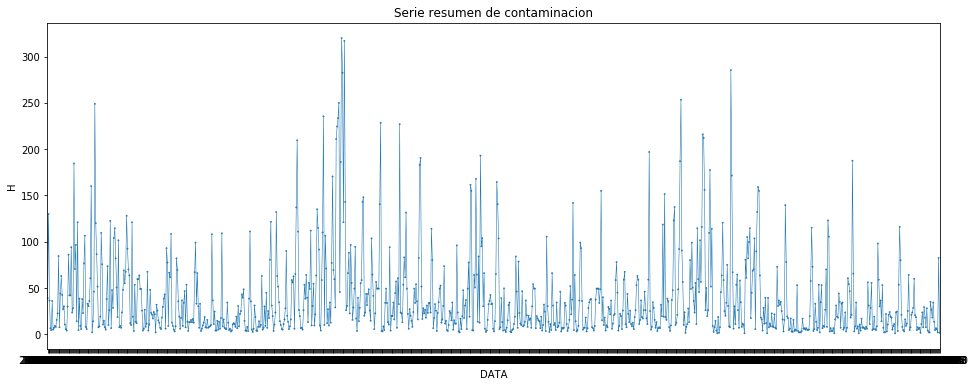

In [39]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_San_NO)
plt.title('Serie resumen de contaminacion')

In [40]:
seriecont_San_NO.to_csv('notebook-serie-San_NO-19', index=False)

In [41]:
data_Sants_NOX = dataSants[dataSants.CONTAMINANT == 'NOX']

In [42]:
data_Sants_NOX = data_Sants_NOX.sort_values(['datetime'])

In [43]:
data_Sants_NOX.replace(to_replace= False, value=True, inplace=True)

In [44]:
data_Sants_NOX['H'] = data_Sants_NOX['H'].astype(float)

In [45]:
seriecont_San_NOX = data_Sants_NOX[data_Sants_NOX.V == True]
seriecont_San_NOX = seriecont_San_NOX .sort_values('H', ascending=False)
seriecont_San_NOX  = seriecont_San_NOX .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_San_NOX  = seriecont_San_NOX .agg({'H': lambda x: x.head(2).mean()})
seriecont_San_NOX = seriecont_San_NOX .reset_index(drop=False)
seriecont_San_NOX = seriecont_San_NOX .groupby('CODI MUNICIPI')
seriecont_San_NOX  = seriecont_San_NOX .rolling(window= 2, on='datetime').mean()
seriecont_San_NOX  = seriecont_San_NOX .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_San_NOX  = seriecont_San_NOX .set_index('datetime')
seriecont_San_NOX = seriecont_San_NOX .groupby(lambda x: x.date)
seriecont_San_NOX  = seriecont_San_NOX .agg({'H':max})

In [46]:
seriecont_San_NOX.index.names = ['DATA']
seriecont_San_NOX = seriecont_San_NOX.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

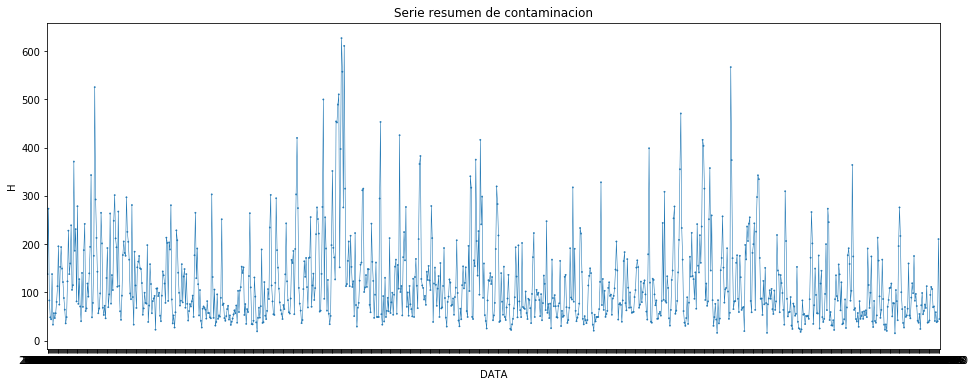

In [47]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_San_NOX)
plt.title('Serie resumen de contaminacion')

In [48]:
seriecont_San_NOX.to_csv('notebook-serie-San_NOX-19', index=False)

In [49]:
data_Sants_NO2 = dataSants[dataSants.CONTAMINANT == 'NO2']

In [50]:
data_Sants_NO2 = data_Sants_NO2.sort_values(['datetime'])

In [51]:
data_Sants_NO2.replace(to_replace= False, value=True, inplace=True)

In [52]:
data_Sants_NO2['H'] = data_Sants_NO2['H'].astype(float)

In [53]:
seriecont_San_NO2 = data_Sants_NO2[data_Sants_NO2.V == True]
seriecont_San_NO2 = seriecont_San_NO2 .sort_values('H', ascending=False)
seriecont_San_NO2  = seriecont_San_NO2 .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_San_NO2  = seriecont_San_NO2 .agg({'H': lambda x: x.head(2).mean()})
seriecont_San_NO2 = seriecont_San_NO2.reset_index(drop=False)
seriecont_San_NO2 = seriecont_San_NO2 .groupby('CODI MUNICIPI')
seriecont_San_NO2  = seriecont_San_NO2 .rolling(window= 2, on='datetime').mean()
seriecont_San_NO2  = seriecont_San_NO2 .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_San_NO2  = seriecont_San_NO2 .set_index('datetime')
seriecont_San_NO2 = seriecont_San_NO2.groupby(lambda x: x.date)
seriecont_San_NO2  = seriecont_San_NO2 .agg({'H':max})

In [54]:
seriecont_San_NO2.index.names = ['DATA']
seriecont_San_NO2 = seriecont_San_NO2.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

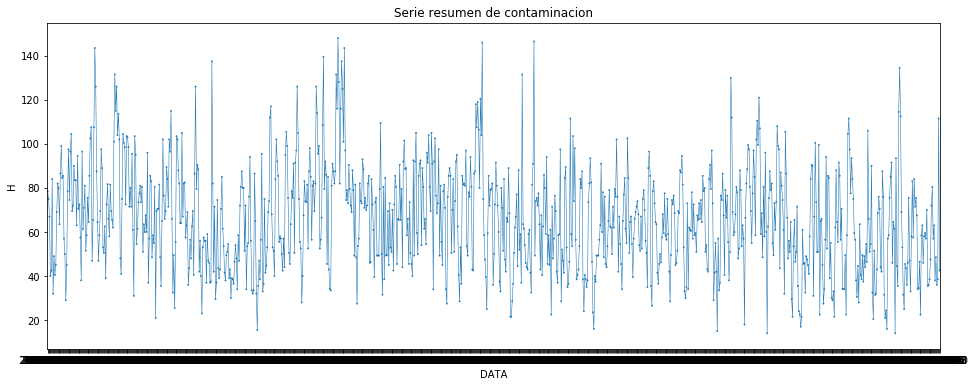

In [55]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_San_NO2)
plt.title('Serie resumen de contaminacion')

In [56]:
seriecont_San_NO2.to_csv('notebook-serie-San_NO2-19', index=False)

In [57]:
dataGracia = data3[data3['NOM ESTACIÓ']== 2]

In [58]:
dataGracia.CONTAMINANT.unique()

array(['PM10', 'NOX', 'O3', 'SO2', 'CO', 'NO', 'NO2'], dtype=object)

In [59]:
data_Gracia_NO = dataGracia[dataGracia.CONTAMINANT == 'NO']

In [60]:
data_Gracia_NO = data_Gracia_NO.sort_values(['datetime'])

In [61]:
data_Gracia_NO.replace(to_replace= False, value=True, inplace=True)

In [62]:
data_Gracia_NO['H'] = data_Gracia_NO['H'].astype(float)

In [63]:
seriecont_Gra_NO = data_Gracia_NO[data_Gracia_NO.V == True]
seriecont_Gra_NO = seriecont_Gra_NO .sort_values('H', ascending=False)
seriecont_Gra_NO  = seriecont_Gra_NO .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Gra_NO  = seriecont_Gra_NO .agg({'H': lambda x: x.head(2).mean()})
seriecont_Gra_NO = seriecont_Gra_NO .reset_index(drop=False)
seriecont_Gra_NO = seriecont_Gra_NO .groupby('CODI MUNICIPI')
seriecont_Gra_NO  = seriecont_Gra_NO .rolling(window= 2, on='datetime').mean()
seriecont_Gra_NO  = seriecont_Gra_NO .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Gra_NO  = seriecont_Gra_NO .set_index('datetime')
seriecont_Gra_NO = seriecont_Gra_NO .groupby(lambda x: x.date)
seriecont_Gra_NO  = seriecont_Gra_NO .agg({'H':max})

In [64]:
seriecont_Gra_NO.index.names = ['DATA']
seriecont_Gra_NO = seriecont_Gra_NO.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

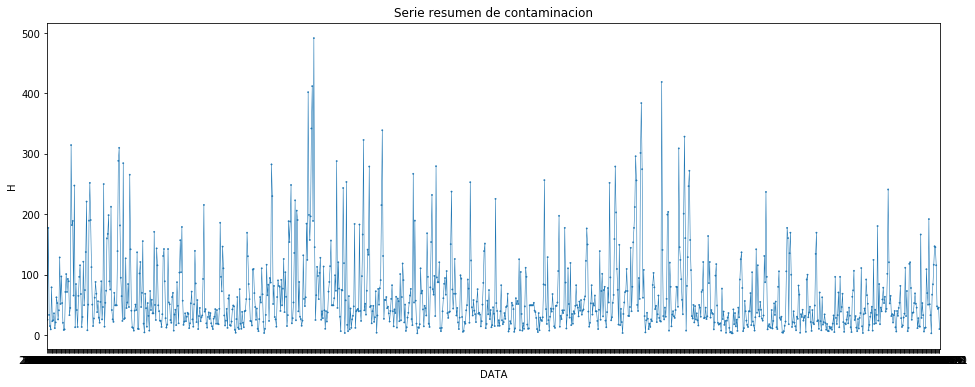

In [65]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Gra_NO)
plt.title('Serie resumen de contaminacion')

In [66]:
seriecont_Gra_NO.to_csv('notebook-serie-Gra_NO-19', index=False)

In [67]:
data_Gracia_NOX = dataGracia[dataGracia.CONTAMINANT == 'NOX']

In [68]:
data_Gracia_NOX = data_Gracia_NOX.sort_values(['datetime'])

In [69]:
data_Gracia_NOX.replace(to_replace= False, value=True, inplace=True)

In [70]:
data_Gracia_NOX['H'] = data_Gracia_NOX['H'].astype(float)

In [71]:
seriecont_Gra_NOX = data_Gracia_NOX[data_Gracia_NOX.V == True]
seriecont_Gra_NOX = seriecont_Gra_NOX .sort_values('H', ascending=False)
seriecont_Gra_NOX  = seriecont_Gra_NOX .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Gra_NOX  = seriecont_Gra_NOX.agg({'H': lambda x: x.head(2).mean()})
seriecont_Gra_NOX = seriecont_Gra_NOX .reset_index(drop=False)
seriecont_Gra_NOX = seriecont_Gra_NOX .groupby('CODI MUNICIPI')
seriecont_Gra_NOX  = seriecont_Gra_NOX .rolling(window= 2, on='datetime').mean()
seriecont_Gra_NOX  = seriecont_Gra_NOX .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Gra_NOX  = seriecont_Gra_NOX .set_index('datetime')
seriecont_Gra_NOX = seriecont_Gra_NOX .groupby(lambda x: x.date)
seriecont_Gra_NOX  = seriecont_Gra_NOX .agg({'H':max})

In [72]:
seriecont_Gra_NOX.index.names = ['DATA']
seriecont_Gra_NOX = seriecont_Gra_NOX.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

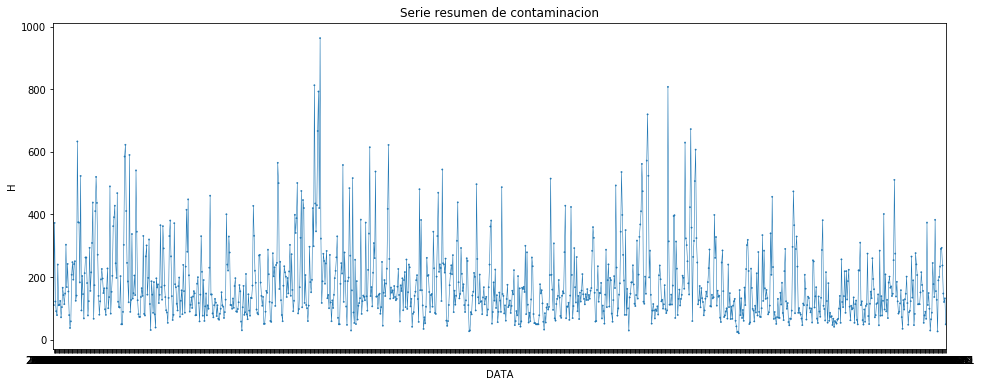

In [73]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Gra_NOX)
plt.title('Serie resumen de contaminacion')

In [74]:
seriecont_Gra_NOX.to_csv('notebook-serie-Gra_NOX-19', index=False)

In [75]:
data_Gracia_NO2 = dataGracia[dataGracia.CONTAMINANT == 'NO2']

In [76]:
data_Gracia_NO2 = data_Gracia_NO2.sort_values(['datetime'])

In [77]:
data_Gracia_NO2.replace(to_replace= False, value=True, inplace=True)

In [78]:
data_Gracia_NO2['H'] = data_Gracia_NO2['H'].astype(float)

In [79]:
seriecont_Gra_NO2 = data_Gracia_NO2[data_Gracia_NO2.V == True]
seriecont_Gra_NO2 = seriecont_Gra_NO2 .sort_values('H', ascending=False)
seriecont_Gra_NO2  = seriecont_Gra_NO2 .groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Gra_NO2  = seriecont_Gra_NO2.agg({'H': lambda x: x.head(2).mean()})
seriecont_Gra_NO2 = seriecont_Gra_NO2 .reset_index(drop=False)
seriecont_Gra_NO2 = seriecont_Gra_NO2 .groupby('CODI MUNICIPI')
seriecont_Gra_NO2  = seriecont_Gra_NO2 .rolling(window= 2, on='datetime').mean()
seriecont_Gra_NO2  = seriecont_Gra_NO2 .drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Gra_NO2  = seriecont_Gra_NO2 .set_index('datetime')
seriecont_Gra_NO2 = seriecont_Gra_NO2 .groupby(lambda x: x.date)
seriecont_Gra_NO2  = seriecont_Gra_NO2 .agg({'H':max})

In [80]:
seriecont_Gra_NO2.index.names = ['DATA']
seriecont_Gra_NO2 = seriecont_Gra_NO2.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

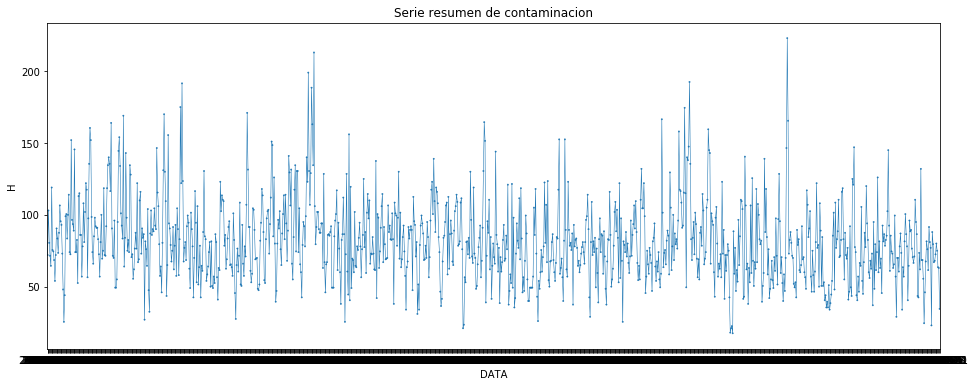

In [81]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Gra_NO2)
plt.title('Serie resumen de contaminacion')

In [82]:
seriecont_Gra_NO2.to_csv('notebook-serie-Gra_NO2-19', index=False)

In [115]:
dataEixample = data3[data3['NOM ESTACIÓ']== 3]

In [116]:
dataEixample

variable,CODI MESURAMENT,datetime,CONTAMINANT,H,V,CODI MUNICIPI,NOM ESTACIÓ
22536,08019043_10_20171231,2017-12-31 01:00:00,PM10,45,True,19,3
22537,08019043_10_20171231,2017-12-31 02:00:00,PM10,38,True,19,3
22538,08019043_10_20171231,2017-12-31 03:00:00,PM10,35,True,19,3
22539,08019043_10_20171231,2017-12-31 04:00:00,PM10,14,True,19,3
22540,08019043_10_20171231,2017-12-31 05:00:00,PM10,5,True,19,3
...,...,...,...,...,...,...,...
356995,8019043_8_20190218,2019-02-18 20:00:00,NO2,37.3272,False,19,3
356996,8019043_8_20190218,2019-02-18 21:00:00,NO2,37.5913,False,19,3
356997,8019043_8_20190218,2019-02-18 22:00:00,NO2,36.2993,False,19,3
356998,8019043_8_20190218,2019-02-18 23:00:00,NO2,34.614,False,19,3


In [117]:
dataEixample.CONTAMINANT.unique()

array(['PM10', 'NOX', 'O3', 'SO2', 'CO', 'NO', 'NO2'], dtype=object)

In [118]:
data_Eixample_NO = dataEixample[dataEixample.CONTAMINANT == 'NO']

In [119]:
data_Eixample_NO = data_Eixample_NO.sort_values(['datetime'])

In [120]:
data_Eixample_NO['H'] = data_Eixample_NO['H'].astype(float)

In [121]:
seriecont_Eix_NO = data_Eixample_NO[data_Eixample_NO.V == True]
seriecont_Eix_NO = seriecont_Eix_NO.sort_values('H', ascending=False)
seriecont_Eix_NO  = seriecont_Eix_NO.groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Eix_NO  = seriecont_Eix_NO.agg({'H': lambda x: x.head(2).mean()})
seriecont_Eix_NO = seriecont_Eix_NO.reset_index(drop=False)
seriecont_Eix_NO = seriecont_Eix_NO.groupby('CODI MUNICIPI')
seriecont_Eix_NO  = seriecont_Eix_NO.rolling(window= 2, on='datetime').mean()
seriecont_Eix_NO  = seriecont_Eix_NO.drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Eix_NO  = seriecont_Eix_NO.set_index('datetime')
seriecont_Eix_NO = seriecont_Eix_NO.groupby(lambda x: x.date)
seriecont_Eix_NO  = seriecont_Eix_NO.agg({'H':max})

In [122]:
seriecont_Eix_NO.index.names = ['DATA']
seriecont_Eix_NO = seriecont_Eix_NO.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

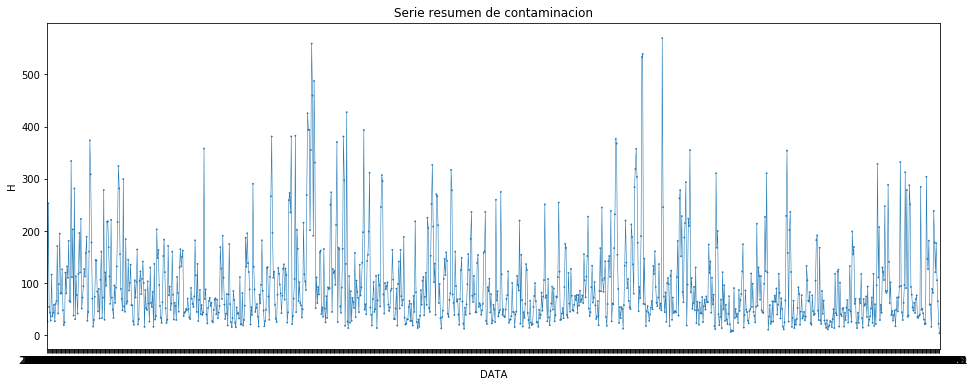

In [123]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Eix_NO)
plt.title('Serie resumen de contaminacion')

In [124]:
seriecont_Eix_NO.to_csv('notebook-serie-Eix_NO-19', index=False)

In [125]:
data_Eixample_NOX = dataEixample[dataEixample.CONTAMINANT == 'NOX']

In [126]:
data_Eixample_NOX = data_Eixample_NOX.sort_values(['datetime'])

In [127]:
data_Eixample_NOX['H'] = data_Eixample_NOX['H'].astype(float)

In [128]:
seriecont_Eix_NOX = data_Eixample_NOX[data_Eixample_NOX.V == True]
seriecont_Eix_NOX = seriecont_Eix_NOX.sort_values('H', ascending=False)
seriecont_Eix_NOX  = seriecont_Eix_NOX.groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Eix_NOX  = seriecont_Eix_NOX.agg({'H': lambda x: x.head(2).mean()})
seriecont_Eix_NOX = seriecont_Eix_NOX.reset_index(drop=False)
seriecont_Eix_NOX = seriecont_Eix_NOX.groupby('CODI MUNICIPI')
seriecont_Eix_NOX  = seriecont_Eix_NOX.rolling(window= 2, on='datetime').mean()
seriecont_Eix_NOX  = seriecont_Eix_NOX.drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Eix_NOX  = seriecont_Eix_NOX.set_index('datetime')
seriecont_Eix_NOX = seriecont_Eix_NOX.groupby(lambda x: x.date)
seriecont_Eix_NOX  = seriecont_Eix_NOX.agg({'H':max})

In [129]:
seriecont_Eix_NOX.index.names = ['DATA']
seriecont_Eix_NOX = seriecont_Eix_NOX.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

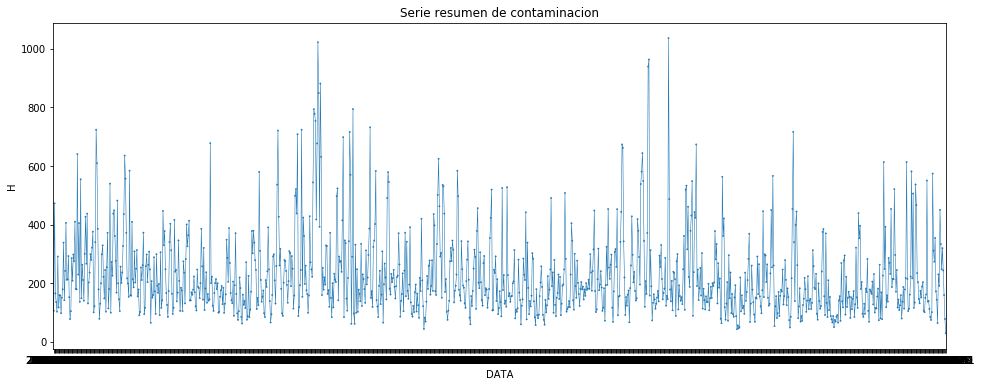

In [130]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Eix_NOX)
plt.title('Serie resumen de contaminacion')

In [131]:
seriecont_Eix_NOX.to_csv('notebook-serie-Eix_NOX-19', index=False)

In [132]:
data_Eixample_NO2 = dataEixample[dataEixample.CONTAMINANT == 'NO2']

In [133]:
data_Eixample_NO2 = data_Eixample_NO2.sort_values(['datetime'])

In [134]:
data_Eixample_NO2['H'] = data_Eixample_NO2['H'].astype(float)

In [135]:
seriecont_Eix_NO2 = data_Eixample_NO2[data_Eixample_NO2.V == True]
seriecont_Eix_NO2 = seriecont_Eix_NO2.sort_values('H', ascending=False)
seriecont_Eix_NO2  = seriecont_Eix_NO2.groupby(['CODI MUNICIPI', 'datetime'])
seriecont_Eix_NO2  = seriecont_Eix_NO2.agg({'H': lambda x: x.head(2).mean()})
seriecont_Eix_NO2 = seriecont_Eix_NO2.reset_index(drop=False)
seriecont_Eix_NO2 = seriecont_Eix_NO2.groupby('CODI MUNICIPI')
seriecont_Eix_NO2  = seriecont_Eix_NO2.rolling(window= 2, on='datetime').mean()
seriecont_Eix_NO2  = seriecont_Eix_NO2.drop('CODI MUNICIPI', axis=1).reset_index()
seriecont_Eix_NO2  = seriecont_Eix_NO2.set_index('datetime')
seriecont_Eix_NO2 = seriecont_Eix_NO2.groupby(lambda x: x.date)
seriecont_Eix_NO2  = seriecont_Eix_NO2.agg({'H':max})

In [136]:
seriecont_Eix_NO2.index.names = ['DATA']
seriecont_Eix_NO2 = seriecont_Eix_NO2.reset_index()

Text(0.5, 1.0, 'Serie resumen de contaminacion')

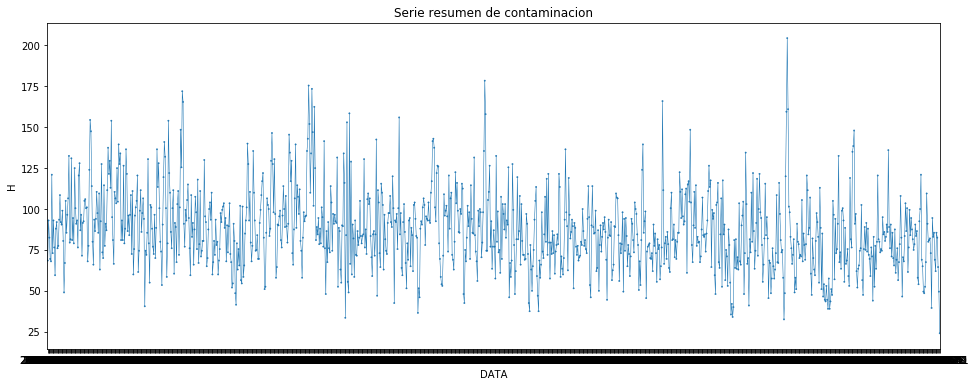

In [137]:
plt.figure(figsize=(16,6))
sns.pointplot('DATA', 'H', scale= 0.2,
             data=seriecont_Eix_NO2)
plt.title('Serie resumen de contaminacion')

In [138]:
seriecont_Eix_NO2.to_csv('notebook-serie-Eix_NO2-19', index=False)

In [139]:
import calendar

In [140]:
seriecont_San_NO.set_index('DATA', inplace=True)

In [141]:
ultimo_fecha = max(seriecont_San_NO.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(seriecont_San_NO.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
seriecont_San_NO = seriecont_San_NO.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [142]:
seriecont_San_NO.index.names = ['DATA']
seriecont_San_NO = seriecont_San_NO.reset_index()

In [143]:
seriecont_San_NO.to_csv('seriecontSan-19-NO', index=False)

In [144]:
seriecont_San_NO2.set_index('DATA', inplace=True)

In [145]:
ultimo_fecha = max(seriecont_San_NO2.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(seriecont_San_NO2.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
seriecont_San_NO2 = seriecont_San_NO2.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [146]:
seriecont_San_NO2.index.names = ['DATA']
seriecont_San_NO2 = seriecont_San_NO2.reset_index()

In [147]:
seriecont_San_NO2.to_csv('seriecontSan-19-NO2', index=False)

In [148]:
seriecont_San_NOX.set_index('DATA', inplace=True)

In [149]:
ultimo_fecha = max(seriecont_San_NOX.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(seriecont_San_NOX.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
seriecont_San_NOX = seriecont_San_NOX.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [150]:
seriecont_San_NOX.index.names = ['DATA']
seriecont_San_NOX = seriecont_San_NOX.reset_index()

In [151]:
seriecont_San_NOX.to_csv('seriecontSan-19-NOX', index=False)

In [152]:
mean_IMD = seriecont_San_NO['H'].astype(float).mean(skipna=True)

In [153]:
seriecont_San_NO['H'].replace(to_replace= np.nan, value=mean_IMD, inplace=True)

In [154]:
seriecont_San_NO.to_csv('seriecontSan-19-NO', index=False)

In [155]:
mean_IMD_1 = seriecont_San_NO2['H'].astype(float).mean(skipna=True)

In [156]:
seriecont_San_NO2['H'].replace(to_replace= np.nan, value= mean_IMD_1, inplace=True)

In [157]:
seriecont_San_NO2.to_csv('seriecontSan-19-NO2', index=False)

In [158]:
mean_IMD_2 = seriecont_San_NOX['H'].astype(float).mean(skipna= True)

In [159]:
seriecont_San_NOX['H'].replace(to_replace= np.nan, value= mean_IMD_2, inplace=True)

In [160]:
seriecont_San_NOX.to_csv('seriecontSan-19-NOX', index=False)